In [1]:

import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set(rc={'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'patch.linewidth': 1})
%matplotlib inline

random_state = 42
np.random.seed(random_state)


In [2]:
data = pd.read_csv("2013_movies.csv")
data


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


In [3]:
### Challenge 1 ###
X = np.ones((100,1))
y = data["DomesticTotalGross"]


Prediction should be the mean
- y_pred = beta * X
- X is all 1s
- prediction is a constant beta
- to minimize MSE, beta should be mean of DomesticTotalGross

In [4]:
np.mean(y)


100596875.22

In [5]:

model = LinearRegression()
# Build the model
fit = model.fit(X, y)


In [6]:
fit.coef_, fit.intercept_

(array([0.]), 100596875.22)

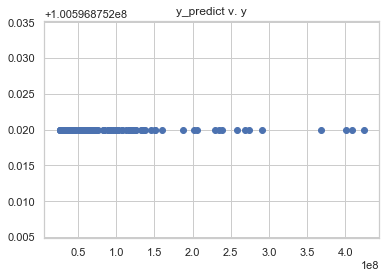

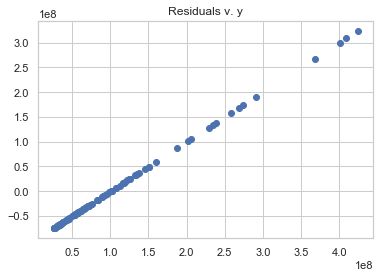

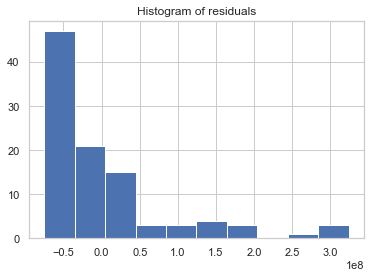

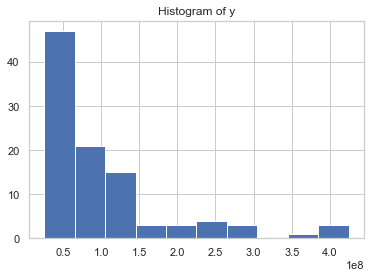

Mean error 0.000000
RMSE 86958327.203901
R-squared 0.000000


In [7]:
# statsmodels puts coef on the intercept, 0 on the slope
# could also be other way around but not unreasonable

y_predict = fit.predict(X)
plt.scatter(y, y_predict);
plt.title("y_predict v. y")
plt.show()

# prediction is always same regardless of y
plt.scatter(y, y-y_predict);
plt.title("Residuals v. y")
plt.show()

# distribution of predictions is skewed similarly to y
# residual is (y - constant) (its mean)
# mean of residuals is 0 but distribution is same as y

plt.hist(y-y_predict)
plt.title("Histogram of residuals")
plt.show()
plt.title("Histogram of y")
plt.hist(y)
plt.show()

print("Mean error %.6f" % np.mean(y-y_predict))
print("RMSE %.6f" % np.sqrt(mean_squared_error(y, y_predict)))
print("R-squared %.6f" % r2_score(y, y_predict))


[0.78463743] 44395595.18320856


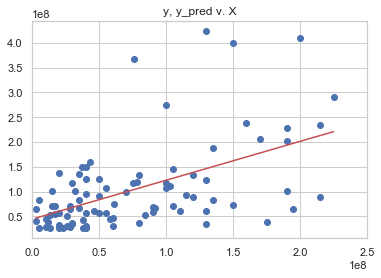

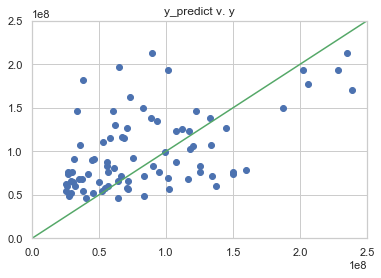

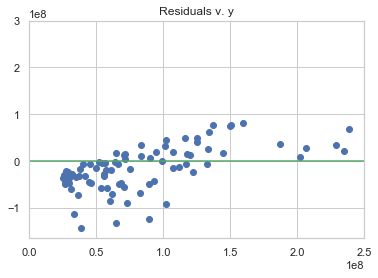

0.000000


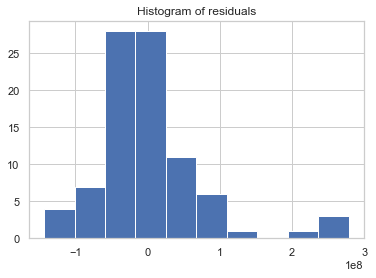

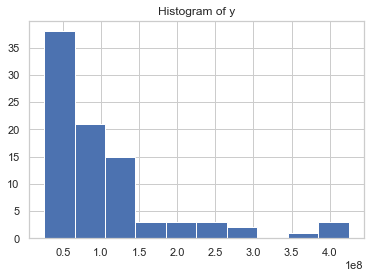

Mean error 0.000000
RMSE 73280682.602335
R-squared 0.285814


In [8]:
### Challenge 2 ###
data2 = data[["Budget", "DomesticTotalGross"]].sort_values("Budget").dropna()
X = data2["Budget"].values.reshape(len(data2),1)
y = data2["DomesticTotalGross"].values

model = LinearRegression()
# Build the model
fit = model.fit(X, y)
print(fit.coef_, fit.intercept_)

y_predict = fit.predict(X)

plt.xlim(0,250000000)
plt.scatter(X[:,0], y);
plt.plot(X[:,0], y_predict, c='r');
plt.title("y, y_pred v. X")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("y_predict v. y")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y-y_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. y")
plt.show()

# distribution of predictions is skewed similarly to y
# residual is (y - constant) (its mean)
# mean of residuals is 0 but distribution is same as y
print("%.6f" % np.mean(y-y_predict))
plt.hist(y-y_predict)
plt.title("Histogram of residuals")
plt.show()
plt.title("Histogram of y")
plt.hist(y)
plt.show()

print("Mean error %.6f" % np.mean(y-y_predict))
print("RMSE %.6f" % np.sqrt(mean_squared_error(y, y_predict)))
print("R-squared %.6f" % r2_score(y, y_predict))


In [9]:
# RMSE is lower, since there is some correlation between budget and domestic gross
# R-squared goes up from 0 to 0.286
# possibly some nonlinearity in the residuals

[ 7.81604382e-01  1.03768217e+07 -6.88859250e+06 -3.48822917e+06] 47340189.490134425


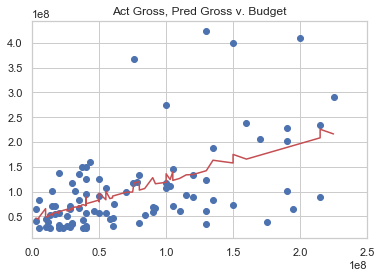

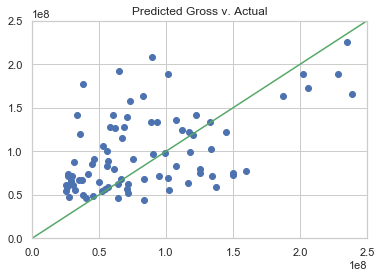

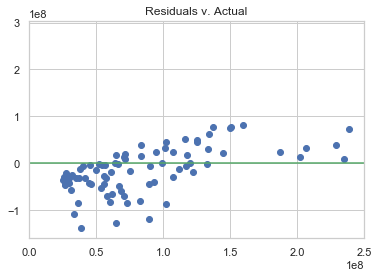

0.000000


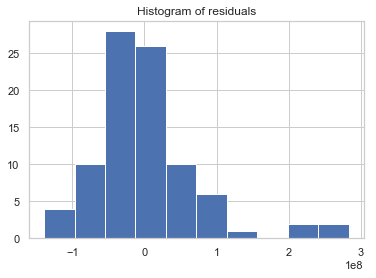

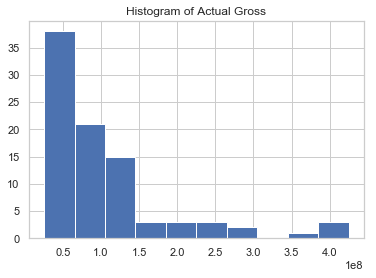

Mean error 0.000000
RMSE 73027101.265856
R-squared 0.290748


In [13]:
### Challenge 3 ###

data3 = data[["Budget", "Rating", "DomesticTotalGross"]].sort_values("Budget").dropna()
# get dummies for rating
X = data3["Budget"].values.reshape(len(data3),1)
X = np.hstack((X, pd.get_dummies(data3["Rating"])))

model = LinearRegression()
# Build the model
fit = model.fit(X, y)
print(fit.coef_, fit.intercept_)

y_predict = fit.predict(X)

plt.xlim(0,250000000)
plt.scatter(X[:,0], y);
plt.plot(X[:,0], y_predict, c='r');
plt.title("Act Gross, Pred Gross v. Budget")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("Predicted Gross v. Actual")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y-y_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. Actual")
plt.show()

# distribution of predictions is skewed similarly to y
# residual is (y - constant) (its mean)
# mean of residuals is 0 but distribution is same as y
print("%.6f" % np.mean(y-y_predict))
plt.hist(y-y_predict)
plt.title("Histogram of residuals")
plt.show()
plt.title("Histogram of Actual Gross")
plt.hist(y)
plt.show()

print("Mean error %.6f" % np.mean(y-y_predict))
print("RMSE %.6f" % np.sqrt(mean_squared_error(y, y_predict)))
print("R-squared %.6f" % r2_score(y, y_predict))


In [12]:
# little improvement
# RMSE went down a little further
# R-squared went up a little further
# some slight nonlinearities/adjustments due to rating
# may not generalize out of sample

(89, 5)
(89, 8)
(89, 8)
alphas to test
[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02 3.16227766e+02 1.00000000e+03 3.16227766e+03
 1.00000000e+04 3.16227766e+04 1.00000000e+05 3.16227766e+05
 1.00000000e+06 3.16227766e+06 1.00000000e+07 3.16227766e+07
 1.00000000e+08 3.16227766e+08 1.00000000e+09 3.16227766e+09
 1.00000000e+10 3.16227766e+10 1.00000000e+11 3.16227766e+11
 1.00000000e+12 3.16227766e+12 1.00000000e+13 3.16227766e+13
 1.00000000e+14 3.16227766e+14 1.00000000e+15 3.16227766e+15
 1.00000000e+16 3.16227766e+16 1.00000000e+17 3.16227766e+17
 1.00000000e+18 3.16227766e+18 1.00000000e+19 3.16227766e+19
 1.00000000e+20]


/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('sp

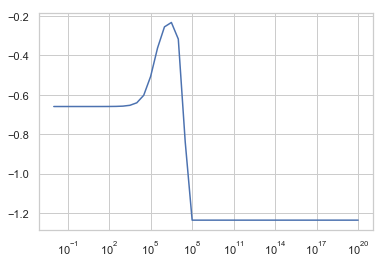

{'alpha': 3162277.6601683795}
Lasso(alpha=3162277.6601683795, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/druce/anaconda3/lib/pyth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
17,0.000891,0.000130,0.000427,0.000052,3.16228e+06,{'alpha': 3162277.6601683795},-0.142998,0.060151,0.014982,-0.801702,...,-0.232567,0.312483,1,0.248606,0.284895,0.337126,0.381169,0.107171,0.271793,0.093852
16,0.000891,0.000177,0.000357,0.000066,1e+06,{'alpha': 1000000.0},-0.196488,0.071983,0.037493,-0.991769,...,-0.254786,0.387520,2,0.254198,0.287855,0.340746,0.385992,0.120021,0.277762,0.090796
18,0.000753,0.000222,0.000384,0.000014,1e+07,{'alpha': 10000000.0},-0.475226,0.016099,0.018529,-0.416273,...,-0.316715,0.297009,3,0.226387,0.265927,0.327696,0.350914,0.024844,0.239154,0.115878
15,0.001344,0.000324,0.000453,0.000089,316228,{'alpha': 316227.7660168379},-0.266108,0.075021,0.043619,-1.303982,...,-0.361921,0.503214,4,0.254780,0.288268,0.341179,0.394057,0.130782,0.281813,0.089113
14,0.001219,0.000360,0.000406,0.000042,100000,{'alpha': 100000.0},-0.312697,0.077134,0.045471,-1.440454,...,-0.506207,0.589716,5,0.255609,0.288527,0.341222,0.395153,0.140115,0.284125,0.086207
13,0.002579,0.001237,0.000574,0.000194,31622.8,{'alpha': 31622.776601683792},-0.351202,0.080579,0.047470,-1.423678,...,-0.601982,0.672942,6,0.256060,0.288929,0.341433,0.396724,0.146181,0.285865,0.084601
12,0.002609,0.000849,0.000503,0.000111,10000,{'alpha': 10000.0},-0.364760,0.081400,0.048384,-1.427626,...,-0.640041,0.717225,7,0.256106,0.288968,0.341478,0.396922,0.146851,0.286065,0.084435
11,0.003763,0.001349,0.000337,0.000062,3162.28,{'alpha': 3162.2776601683795},-0.369198,0.081629,0.048663,-1.430284,...,-0.652754,0.732846,8,0.256111,0.288974,0.341482,0.396965,0.146918,0.286090,0.084424
10,0.004908,0.001342,0.000512,0.000095,1000,{'alpha': 1000.0},-0.370625,0.081700,0.048747,-1.431344,...,-0.656939,0.738065,9,0.256112,0.288974,0.341483,0.396973,0.146925,0.286093,0.084424
9,0.004801,0.000666,0.000467,0.000073,316.228,{'alpha': 316.22776601683796},-0.371093,0.081722,0.048776,-1.431687,...,-0.658277,0.739736,10,0.256112,0.288974,0.341483,0.396975,0.146925,0.286094,0.084425


In [72]:
# Challenge 4

# add Runtime and polynomial features
from sklearn.preprocessing import PolynomialFeatures

data4 = data[["Budget", "Rating", "Runtime", "DomesticTotalGross"]].sort_values("Budget").dropna()
# get dummies for rating
X = data4[["Budget", "Runtime"]].values.reshape(len(data4),2)

poly = PolynomialFeatures(2, include_bias=False)
X = poly.fit_transform(X)
print(X.shape)
X = np.hstack((X, pd.get_dummies(data4["Rating"])))
print(X.shape)
# scale
scaler = preprocessing.StandardScaler()
# train scaler on training data
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

params = {
    "alpha": np.logspace(-2, 20, 45)
}

print("alphas to test")
print(params['alpha'])

def build_grid_search_est(model, X, y, params, cv):
    
    #n_jobs = 4 because 8 or -1 maxes out memory and dies
    grid_est = GridSearchCV(model, param_grid=params, cv=cv, scoring="r2", n_jobs=4)
    grid_est.fit(X_scaled, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        tempdf = df.groupby(['param_' + param]).mean().reset_index()
        plt.semilogx(tempdf['param_' + param], tempdf.mean_test_score)
        plt.show()
    return grid_est

grid_est = build_grid_search_est(Lasso(), 
                                 X_scaled, y, 
                                 params, 
                                 cv=5)

print(grid_est.best_params_)
print(grid_est.best_estimator_)

pd.DataFrame(grid_est.cv_results_).sort_values("mean_test_score", ascending=False)

[ 6424837.11869819   634953.0558511         0.         36388029.17477199
        0.          6630572.24149201       -0.               -0.        ] 103045039.13483146


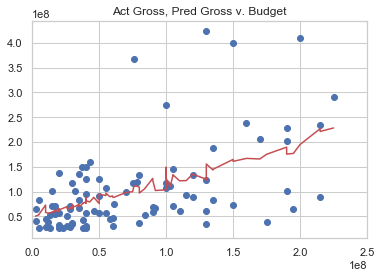

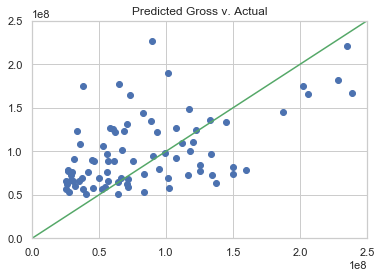

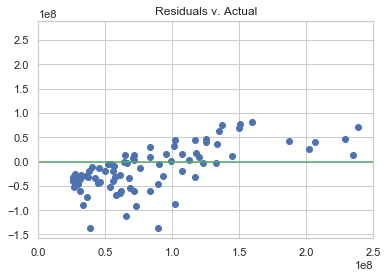

0.000000


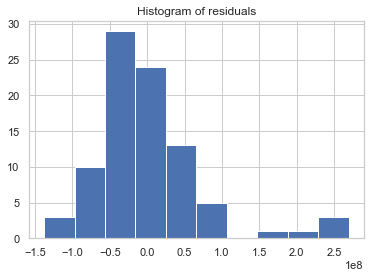

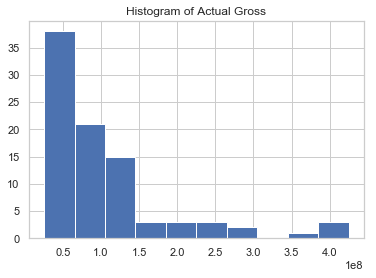

Mean error 0.000000
RMSE 72607036.349137
R-squared 0.298884


In [73]:
# Build the model
model = Lasso(alpha=3162277.6601683795)
fit = model.fit(X_scaled, y)
print(fit.coef_, fit.intercept_)

y_predict = fit.predict(X_scaled)

plt.xlim(0,250000000)
plt.scatter(X[:,0], y);
plt.plot(X[:,0], y_predict, c='r');
plt.title("Act Gross, Pred Gross v. Budget")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("Predicted Gross v. Actual")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y-y_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. Actual")
plt.show()

print("%.6f" % np.mean(y-y_predict))
plt.hist(y-y_predict)
plt.title("Histogram of residuals")
plt.show()
plt.title("Histogram of Actual Gross")
plt.hist(y)
plt.show()

print("Mean error %.6f" % np.mean(y-y_predict))
print("RMSE %.6f" % np.sqrt(mean_squared_error(y, y_predict)))
print("R-squared %.6f" % r2_score(y, y_predict))

In [75]:
print(model.coef_)
print(model.coef_[[0, 1, 3, 5]])
X_scaled=X_scaled[:, [0,1,3,5]]

[ 6424837.11869819   634953.0558511         0.         36388029.17477199
        0.          6630572.24149201       -0.               -0.        ]
[ 6424837.11869819   634953.0558511  36388029.17477199  6630572.24149201]


[18765747.71259708  6835414.17104262 24160420.48220052 10683158.15400966] 103045039.13483146


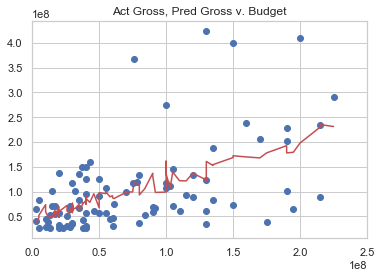

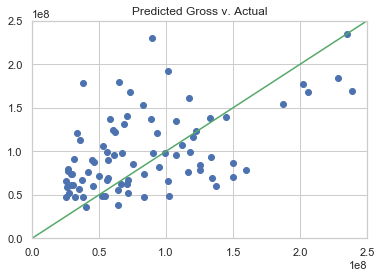

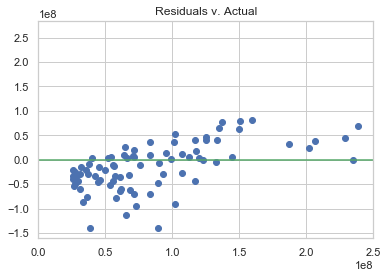

Mean error 0.000000
RMSE 72381295.861951
R-squared 0.303237


In [76]:
# use these 4 predictors, no big lasso penalty
model = LinearRegression()
fit = model.fit(X_scaled, y)
print(fit.coef_, fit.intercept_)

y_predict = fit.predict(X_scaled)

plt.xlim(0,250000000)
plt.scatter(X[:,0], y);
plt.plot(X[:,0], y_predict, c='r');
plt.title("Act Gross, Pred Gross v. Budget")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("Predicted Gross v. Actual")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y, y-y_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. Actual")
plt.show()

print("Mean error %.6f" % np.mean(y-y_predict))
print("RMSE %.6f" % np.sqrt(mean_squared_error(y, y_predict)))
print("R-squared %.6f" % r2_score(y, y_predict))

In [77]:
# very slight improvemeht
# need to go back and map features and coefs to original scale and write out equation, which is laborious
# will be - some rating increase/decrease EV of expected gross by linear amount
# gross increases linearly/quadratically with domestic budget, runtime, interaction
# but only a few of these since we only have 4 coefs

[-3434002.83318346  8043130.83893451 44610498.98129426 10153320.21496866] 99247963.9946528


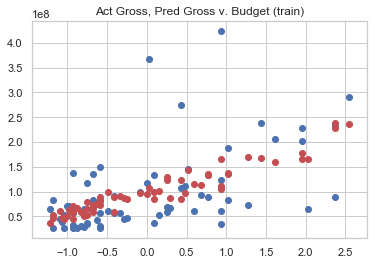

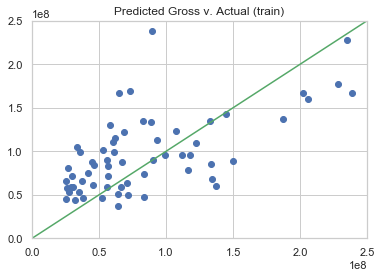

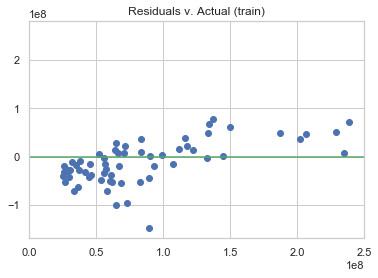

Training RMSE 67561538.711608
Training R-squared 0.325398


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

model = LinearRegression()
fit = model.fit(X_train, y_train)
print(fit.coef_, fit.intercept_)

y_train_predict = fit.predict(X_train)

plt.scatter(X_train[:,0], y_train);
plt.scatter(X_train[:,0], y_train_predict, c='r');
plt.title("Act Gross, Pred Gross v. Budget (train)")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y_train, y_train_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("Predicted Gross v. Actual (train)")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y_train, y_train-y_train_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. Actual (train)")
plt.show()

print("Training RMSE %.6f" % np.sqrt(mean_squared_error(y_train, y_train_predict)))
print("Training R-squared %.6f" % r2_score(y_train, y_train_predict))



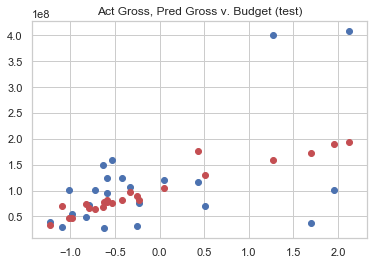

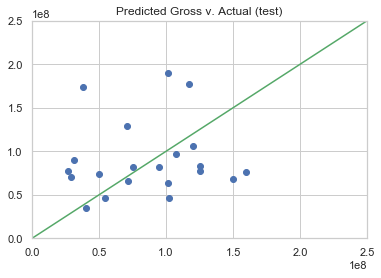

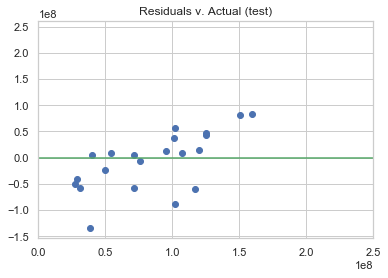

Test RMSE 85784260.585018
Test R-squared 0.228847


In [85]:
y_test_predict = fit.predict(X_test)

plt.scatter(X_test[:,0], y_test);
plt.scatter(X_test[:,0], y_test_predict, c='r');
plt.title("Act Gross, Pred Gross v. Budget (test)")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y_test, y_test_predict);
plt.ylim(0,250000000)
plt.plot([0,250000000], [0,250000000], c='g')
plt.title("Predicted Gross v. Actual (test)")
plt.show()

plt.xlim(0,250000000)
plt.scatter(y_test, y_test-y_test_predict);
plt.plot([0,250000000], [0,0], c='g')
plt.title("Residuals v. Actual (test)")
plt.show()

print("Test RMSE %.6f" % np.sqrt(mean_squared_error(y_test, y_test_predict)))
print("Test R-squared %.6f" % r2_score(y_test, y_test_predict))


In [ ]:
# Train is even better than before: less training data, more overfitting
# Test RMSE and R-squared are much worse than train